# Bode Plot Tutorial — 4

**Topic:** Second-order plant with time delay and a $P$ controller — magnitude & phase Bode plots

We focus on how a proportional gain affects the open-loop Bode plot (magnitude & phase) for a second-order underdamped system with time delay. This helps understand bandwidth changes from simple proportional tuning.

## 1. Setup

Plant: second-order underdamped system with time delay
$$G(s) = \frac{5 e^{-0.09s}}{s^2 + 2(0.0015)s + 1}$$

Controller: $P$ controller $C(s) = K_p$ (just a scalar gain). We will plot the open-loop transfer function $L(s) = C(s) G(s) = K_p G(s)$.

In [7]:
# Imports (standalone cell)
import numpy as np
import matplotlib.pyplot as plt
import control as ct
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)

In [8]:
# Define plant
# G(s) = 3*exp(-0.02*s)/(s^2+2*0.0023*s+1)
K = 5.0
theta = 0.09  # time delay
zeta = 0.0015
wn = 1.0

# Create the second-order transfer function
num = [K]
den = [1, 2*zeta*wn, wn**2]
G_base = ct.tf(num, den)

# Approximate time delay using Padé approximation (3rd order for accuracy)
pade_num, pade_den = ct.pade(theta, 3)
G_delay = ct.tf(pade_num, pade_den)

# Complete transfer function with time delay
G = G_base * G_delay

print("Plant G(s) = 3*exp(-0.02*s)/(s^2 + 2*0.0023*s + 1)")
print("Transfer function:", G)

Plant G(s) = 3*exp(-0.02*s)/(s^2 + 2*0.0023*s + 1)
Transfer function: <TransferFunction>: sys[38]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            -5 s^3 + 666.7 s^2 - 3.704e+04 s + 8.23e+05
  ---------------------------------------------------------------
  s^5 + 133.3 s^4 + 7409 s^3 + 1.648e+05 s^2 + 7901 s + 1.646e+05


## 2. Effect of proportional gain on Bode magnitude and phase

We will compare open-loop Bode plots for a few $K_p$ values (e.g., 0.5, 1, 2, 5). Note that the phase is independent of $K_p$ because multiplying by a positive real scalar affects magnitude only; magnitude shifts by $20*log_{10}(Kp)$. The time delay contributes a frequency-dependent phase lag.

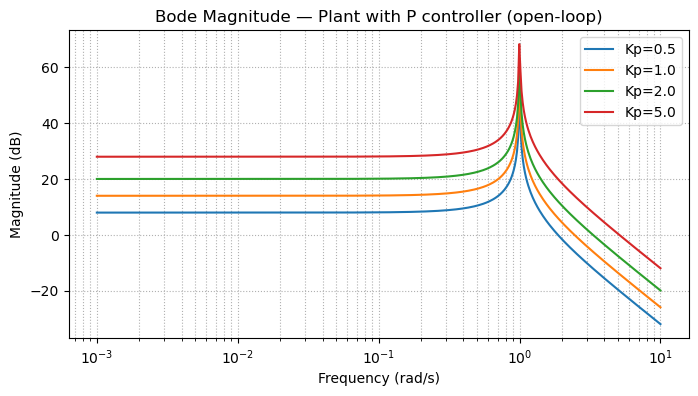

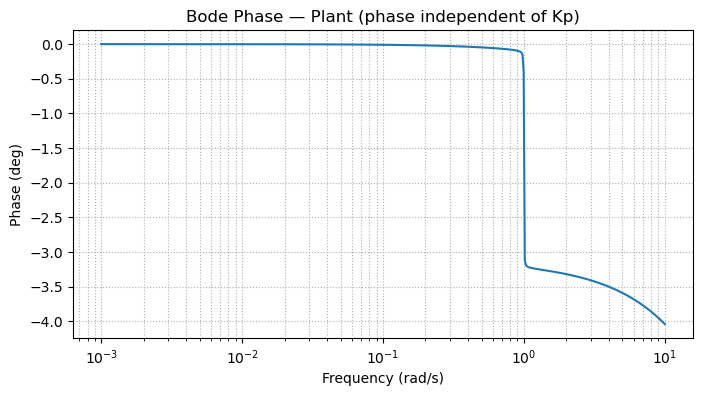

In [9]:
# Gains to compare
Kp_list = [0.5, 1.0, 2.0, 5.0]
w = np.logspace(-3, 1, 500)

plt.figure()
for Kp in Kp_list:
    L = Kp * G
    mag, phase, omega = ct.bode(L, w, dB=True, deg=True, plot=False)
    plt.semilogx(omega, 20*np.log10(mag), label=f"Kp={Kp}")
plt.title('Bode Magnitude — Plant with P controller (open-loop)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True, which='both', linestyle=':')

# Phase plot
plt.figure()
mag0, phase0, omega0 = ct.bode(G, w, dB=True, deg=True, plot=False)
plt.semilogx(omega0, phase0)
plt.title('Bode Phase — Plant (phase independent of Kp)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (deg)')
plt.grid(True, which='both', linestyle=':')
plt.show()

## 3. Quick observation

- Increasing $K_p$ shifts the magnitude curve up by $20\log_{10}(K_p)$ dB. The phase remains unchanged for positive gains.
- This is why proportional tuning affects bandwidth and gain crossover frequency.


## Exercise 4 — $P$ controller

**Task:** Pick a $K_p$ value that approximately increases the gain crossover frequency (frequency where magnitude crosses $0$ dB) by a factor of $2$ compared to $K_p=1.0$. Replot the open-loop Bode magnitude and phase and comment (1–2 lines) on whether phase at the new crossover changed.

Fill the blank code cells below.

In [12]:
# --- Choose a Kp and re-plot open-loop Bode ---
# Hint: try Kp = 2.0 or Kp = 5.0 and compare the gain crossover frequency to Kp=1.0

# Use the plant G defined above

# Compare and plot two proportional gains

# Phase plot


In [11]:
# --- Blank cell to write a short comment on what you observe re: crossover freq and phase ---
# Example: print("With higher Kp the crossover frequency increased; phase at crossover is similar since phase is independent of Kp.")
